# Chennai Water Management
## Exploratory Analysis

## Reading in the data

In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
%matplotlib inline

Since both input files have the same format (a date column and then 4 columns specifying areas in Chennai and their respective reservoir/rainfall levels) we can define a standard method to read in the data, appropriately parse the date column, and return a sorted frame.  We sort just in case the data itself does not come to us sorted.

In [2]:
def read_input_file(filepath):
    """Reads in the input files located by the filepath <str> argument and returns a parsed dataframe."""
    
    frame = pd.read_csv(filepath)
    frame['Date'] = pd.to_datetime(frame['Date'], format='%d-%m-%Y')
    frame.drop(frame[frame['Date'] > pd.to_datetime('11-8-2019', format = '%d-%m-%Y')].index, inplace = True)
    frame = frame.sort_values('Date', ascending=True).reset_index(drop=True)
    return frame

In [3]:
reservoir_levels = read_input_file("/Users/kavitakarki/Downloads/Major/chennai_reservoir_levels.csv")
rainfall = read_input_file("/Users/kavitakarki/Downloads/Major/chennai_reservoir_rainfall.csv")

Creating two series with timestamps of the reservoir and rainfall dataframes.

In [4]:
from datetime import datetime 
def toTimeStamp(x):
    return datetime.timestamp(x)
    
#toTimeStamp = lambda x: datetime.timestamp(x) 
#print(toTimeStamp(frame['Date'][0]))
#frame['TimeStamp'] = toTimeStamp(frame['Date'])
    
frame_reservoir_levels = reservoir_levels['Date'].apply(toTimeStamp)
frame_rainfall = rainfall['Date'].apply(toTimeStamp)
#frame_reservoir_levels.head()

---

## Taking a first look

So first let's take a look at the data we have, we can verify that the two dataframes have the same format of rows and columns.

In [5]:
reservoir_levels.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,3.9,0.0,268.0,0.0
1,2004-01-02,3.9,0.0,268.0,0.0
2,2004-01-03,3.9,0.0,267.0,0.0
3,2004-01-04,3.9,0.0,267.0,0.0
4,2004-01-05,3.8,0.0,267.0,0.0


In [6]:
rainfall.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,0.0,0.0,0.0,0.0
1,2004-01-02,0.0,0.0,0.0,0.0
2,2004-01-03,0.0,0.0,0.0,0.0
3,2004-01-04,0.0,0.0,0.0,0.0
4,2004-01-05,0.0,0.0,0.0,0.0


Lets also take a look at a quick description of the columns so we can get an idea of the range of values we have to work with.

In [7]:
reservoir_levels.describe()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
count,5702.000000,5702.000000,5702.000000,5702.000000
mean,1122.505986,237.705396,1553.217722,1308.637347
std,1026.860442,274.279168,899.222088,961.146075
min,0.900000,0.000000,0.000000,0.000000
25%,202.000000,19.250000,819.000000,446.750000
50%,763.000000,91.000000,1614.000000,1213.000000
75%,1998.000000,457.000000,2228.000000,2069.000000
max,3231.000000,896.000000,3300.000000,3396.000000


In [8]:
rainfall.describe()

,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
count,5702.000000,5702.000000,5702.000000,5702.000000
mean,3.353429,3.604384,3.748509,3.918108
std,12.706798,14.028537,15.005051,16.231384
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,300.000000,293.000000,320.000000,475.000000


---

## Visualization

There's only so much we can get from a dataset by looking at the raw data as a table.  Let's try to take an initial look at the reservoir and rainfall levels in Chennai over time visually.  This will give us a much better sense of what our data looks like.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


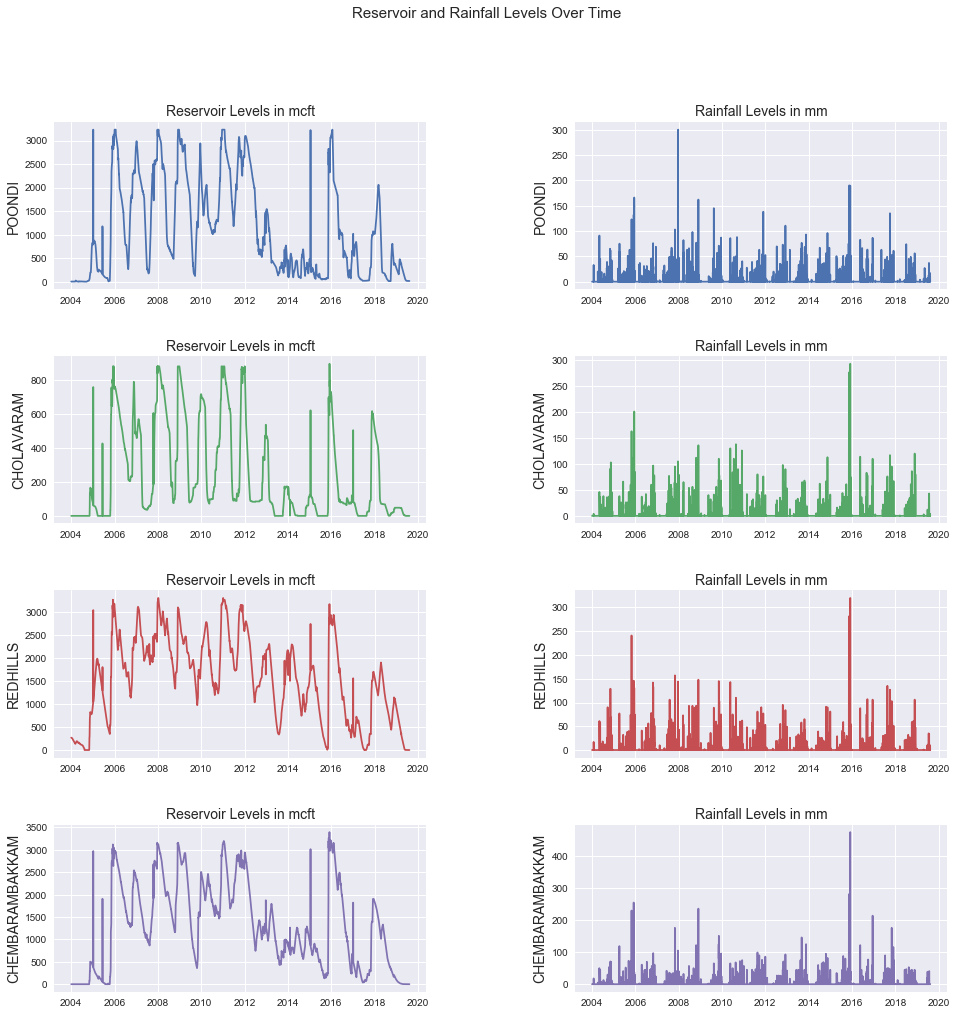

In [9]:
def plot_rainfall_and_reservoir_levels(reservoir_levels, rainfall, type='line', alpha=1):
    """
    Creates 8 plots, 4 rows and 2 columns, with one row per region in Chennai where the first
    "cell" holds the reservoir levels over time and the second holds rainfall levels over time.
    The 'type' variable determines the output is a line plot (type = 'line') or if the output is
    a barplot (type != 'line').
    """
    fig, ax = plt.subplots(4, 2, figsize=(16, 16))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for index, column in enumerate(reservoir_levels.columns[1:]):
        c = colors[index]
        if type == 'line':
            ax[index][0].plot(reservoir_levels['Date'], reservoir_levels[column], color=c, alpha=alpha)
            ax[index][1].plot(rainfall['Date'], rainfall[column], color=c, alpha=alpha)
        else:
            ax[index][0].bar(reservoir_levels['Date'], reservoir_levels[column], color=c, alpha=alpha)
            ax[index][1].bar(rainfall['Date'], rainfall[column], color=c, alpha=alpha)
        ax[index][0].set_ylabel(column, size=14)
        ax[index][1].set_ylabel(column, size=14)
        ax[index][0].set_title('Reservoir Levels in mcft', size=14)
        ax[index][1].set_title('Rainfall Levels in mm', size=14)
    fig.suptitle('Reservoir and Rainfall Levels Over Time', size=15)

plot_rainfall_and_reservoir_levels(reservoir_levels, rainfall)

we're interested in how the rainfall levels tie together with the reservoir levels, let's plot them together and see if we can identify any trends.

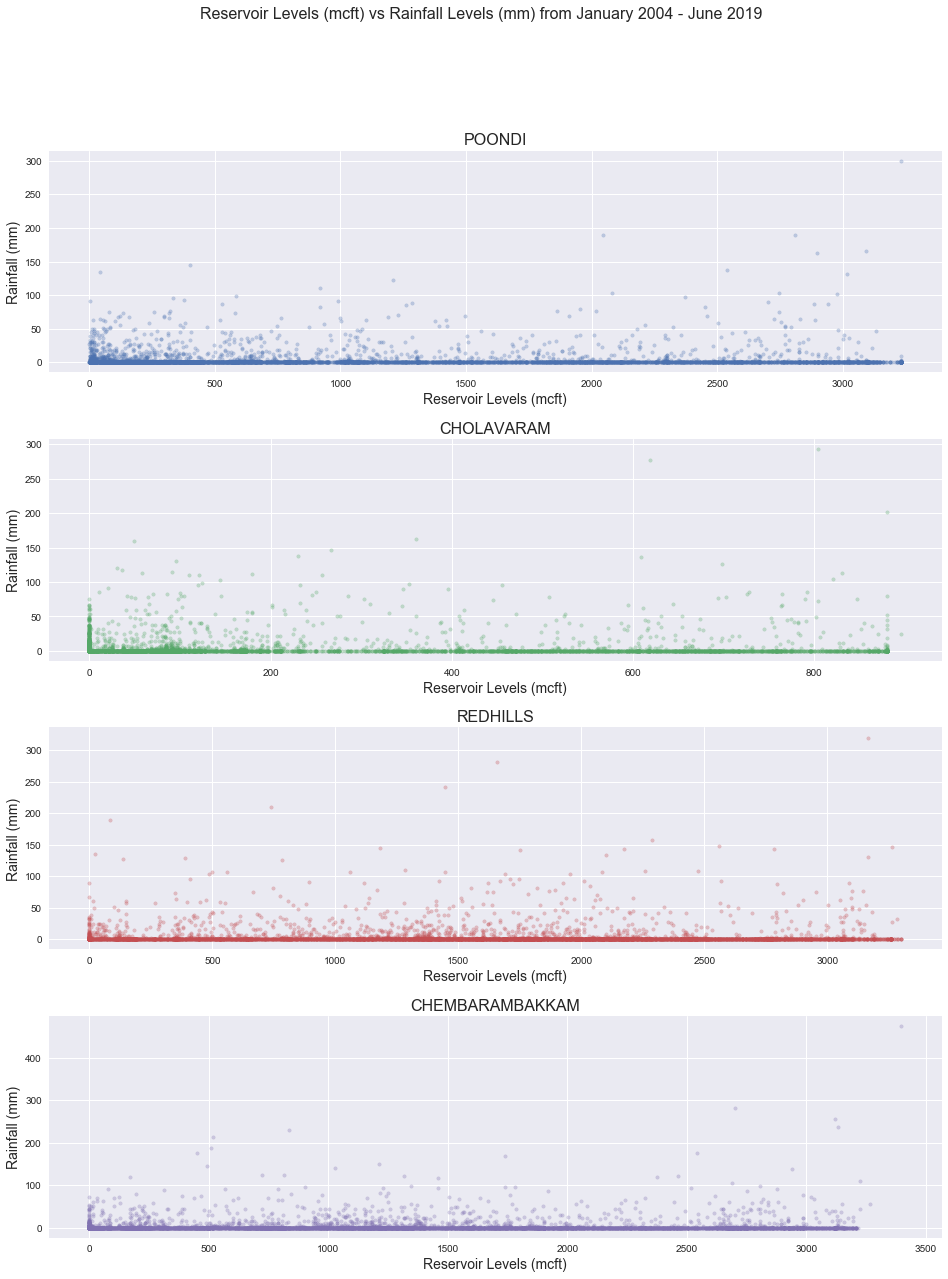

In [10]:
# Fof each region, plot reservoir levels vs rainfall levels
fig, ax = plt.subplots(4, 1, figsize=(16, 20))
for index, column in enumerate(reservoir_levels.columns[1:]):
    ax[index].scatter(reservoir_levels[column], rainfall[column], marker='.', color=colors[index], alpha=0.3)
    ax[index].set_ylabel('Rainfall (mm)', size=14)
    ax[index].set_title(column, size=16)
    ax[index].set_xlabel('Reservoir Levels (mcft)', size=14)
fig.suptitle('Reservoir Levels (mcft) vs Rainfall Levels (mm) from January 2004 - June 2019', size=16)
fig.subplots_adjust(hspace=0.3)

Calculating aggregate and plotting them to see which year recieved less rain.

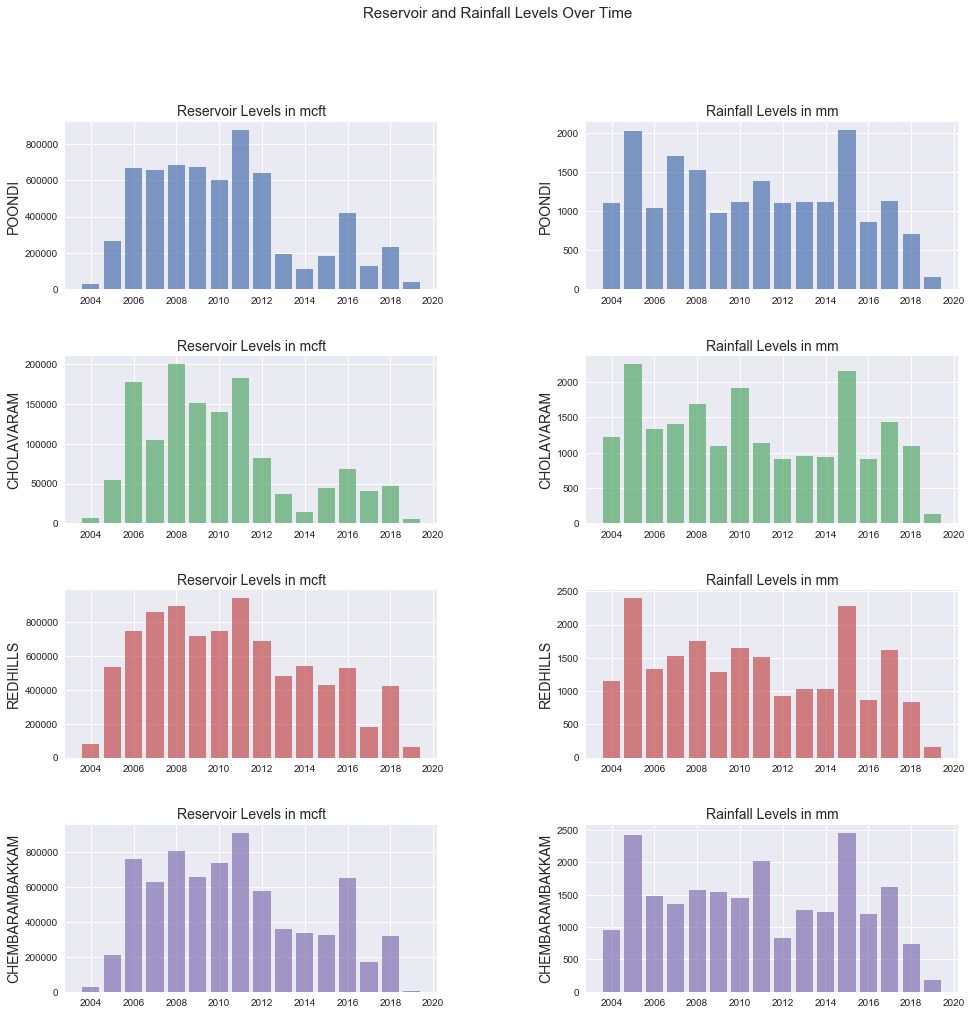

In [11]:
res_year = reservoir_levels.groupby(reservoir_levels.Date.dt.year).sum().reset_index()
rain_year = rainfall.groupby(rainfall.Date.dt.year).sum().reset_index()
plot_rainfall_and_reservoir_levels(res_year, rain_year, 'bar', 0.7)

Take a look at the aggregated rainfall across all the regions per year.

Text(0.5, 1.0, 'Rainfall Across All 4 Chennai Regions by Year')

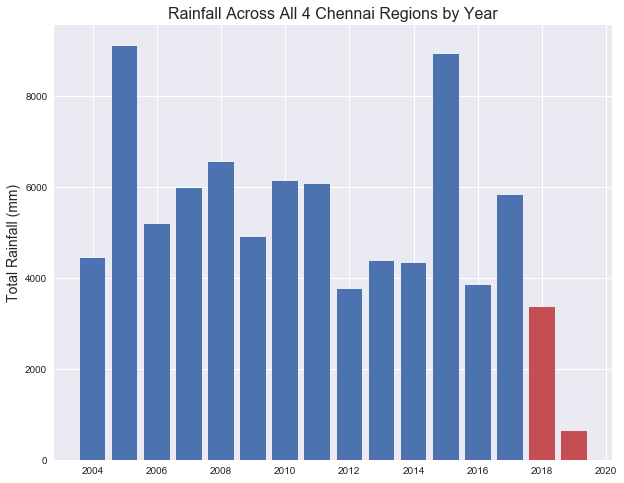

In [12]:
# Aggregate per year
rain_year_aggregate = rain_year.iloc[:, 1:].sum(axis=1)
c = [colors[0] for i in range(rain_year_aggregate.shape[0] - 2)]
c += [colors[2] for i in range(2)]

plt.figure(figsize=(10, 8))
plt.bar(rain_year['Date'], rain_year_aggregate, color=c)
plt.ylabel('Total Rainfall (mm)', size=14)
plt.title('Rainfall Across All 4 Chennai Regions by Year', size=16)

By looking at the start of the dry season, we can see how prepared Chennai will be until the next monsoon season.

In [13]:
# Subset to the beginning of February for each year
is_february = reservoir_levels['Date'].dt.month == 2
is_day_one = reservoir_levels['Date'].dt.day == 1
dry_season_res_levels = reservoir_levels.loc[is_february & is_day_one, :].reset_index(drop=True)
dry_season_res_levels

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-02-01,4.8,0.0,220.0,0.0
1,2005-02-01,851.4,56.5,1458.0,275.0
2,2006-02-01,3035.0,721.0,2624.0,2843.0
3,2007-02-01,2565.0,545.0,3106.0,2157.0
4,2008-02-01,3061.0,867.0,3022.0,2960.0
5,2009-02-01,3025.0,778.0,2528.0,2679.0
6,2010-02-01,1493.0,686.0,2342.0,2254.0
7,2011-02-01,3108.0,840.0,3254.0,3080.0
8,2012-02-01,3048.0,495.0,2771.0,2719.0
9,2013-02-01,1359.0,398.0,2212.0,980.0


Text(0.5, 1.0, 'Reservoir Levels at the beginning of Dry Season in Chennai')

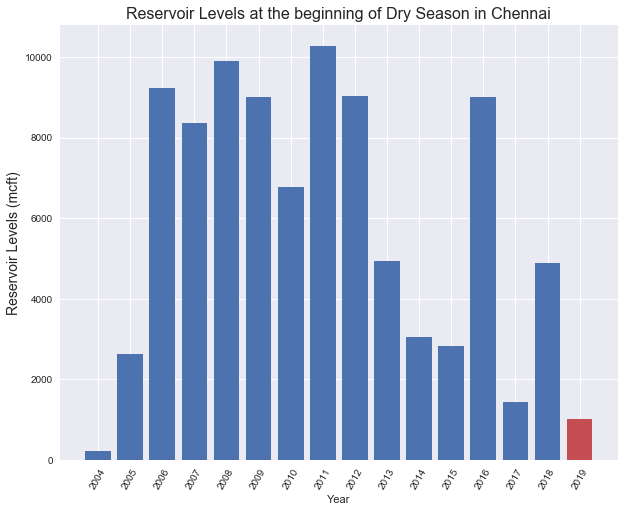

In [14]:
# Sum reservoir levels across all 4 regions per year
dry_season_res_all_regions = dry_season_res_levels.iloc[:, 1:].sum(axis=1)
x_tick_locations = range(dry_season_res_levels.shape[0])
c = [colors[0] for i in range(dry_season_res_levels.shape[0] - 1)]
c.append(colors[2])

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.bar(x_tick_locations, dry_season_res_all_regions, color=c)
ax.set_xticks(x_tick_locations)
ax.set_xticklabels(dry_season_res_levels.Date.dt.strftime('%Y'), rotation=60)
ax.set_ylabel('Reservoir Levels (mcft)', size=14)
ax.set_xlabel('Year')
ax.set_title('Reservoir Levels at the beginning of Dry Season in Chennai', size=16)

## Conclusion and Next Steps

So based on everything we've seen, we can tell that Chennai has experienced low reservoir levels before, and it appears that they are facing very low reservoir levels now during the current dry season, lower than most other years.  We can also see that rainfall and reservoir levels are tied together, however this is much more apparent when we aggregate rainfall over the course of some number of days as opposed to simply viewing the daily data as is.

What could we do with this information?  Well, if we were interested in starting to model, we might decide to run a regression analysis on the last plots, and identify whether aggregated rainfall can tell us what the reservoir levels will be like some $X$ number of days later.  We could also use unsupervised clustering on the individual rainfall or reservoir level data to confirm that there was indeed a shift in the average reservoir level over time.

If we wanted to do some highly predictive modeling, especially via machine learning methods, we probably would want to include some more data, including the population in chennai, the low/high temperatures per day, the number of households near the reservoirs (to account for urbanization affecting the reservoirs' performance), etc.  Any (and likley all) of these features might help us predict what reservoir levels might be in the future based on projected rainfall, which may help people better prepare for droughts before they happen.

In [15]:
temperature = pd.read_csv("/Users/kavitakarki/Downloads/Major/chennai_temperature.csv")
temperature['Date'] = temperature['MONTH'].map(str) + "-" + temperature['DAY'].map(str) + "-" + temperature['YEAR'].map(str) 
temperature['Date'] = pd.to_datetime(temperature['Date'], format='%m-%d-%Y')
temperature = temperature.sort_values('Date', ascending=True).reset_index(drop=True)
temperature.head()

,MONTH,DAY,YEAR,TEMPERATURE,Date
0,1,1,1995,72.4,1995-01-01
1,1,2,1995,73.5,1995-01-02
2,1,3,1995,72.6,1995-01-03
3,1,4,1995,75.2,1995-01-04
4,1,5,1995,74.8,1995-01-05


In [16]:
'''remove excess data from the year 1995-2004'''
temperature.drop(temperature[temperature['Date'] < pd.to_datetime('1-1-2004', format = '%m-%d-%Y')].index, inplace = True)
temperature = temperature.sort_values('Date', ascending=True).reset_index(drop=True)
temperature.head()

,MONTH,DAY,YEAR,TEMPERATURE,Date
0,1,1,2004,76.9,2004-01-01
1,1,2,2004,75.1,2004-01-02
2,1,3,2004,74.3,2004-01-03
3,1,4,2004,75.6,2004-01-04
4,1,5,2004,76.3,2004-01-05


## LINEAR REGRESSION

We try predicting reservoir level trend of Poondi using Linear Regression using reservoir_levels as a single variable.

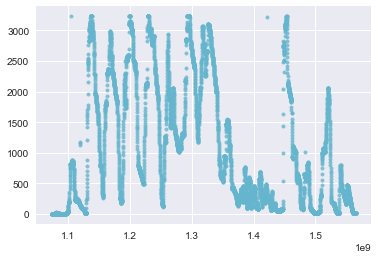

In [17]:
from pylab import *

#scatter(frame_rainfall, rainfall['POONDI'], marker='.', color=colors[5], alpha=0.8)
scatter(frame_reservoir_levels, reservoir_levels['POONDI'], marker='.', color=colors[5], alpha=0.8)

In [18]:
from scipy import stats

#slope, intercept, r_value, p_value, std_err = stats.linregress(frame_rainfall, rainfall['POONDI'])
slope, intercept, r_value, p_value, std_err = stats.linregress(frame_reservoir_levels, reservoir_levels['POONDI'])
reservoir_levels.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,2004-01-01,3.9,0.0,268.0,0.0
1,2004-01-02,3.9,0.0,268.0,0.0
2,2004-01-03,3.9,0.0,267.0,0.0
3,2004-01-04,3.9,0.0,267.0,0.0
4,2004-01-05,3.8,0.0,267.0,0.0


In [19]:
r_value ** 2

0.07039478108909977

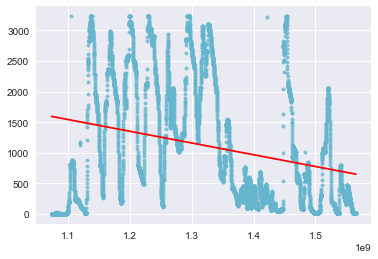

In [20]:
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept

fitLine = predict(frame_reservoir_levels)

#plt.scatter(frame_rainfall, rainfall['POONDI'])
#plt.plot(frame_rainfall, fitLine, c='r')
plt.scatter(frame_reservoir_levels, reservoir_levels['POONDI'] , marker='.', color=colors[5], alpha=0.8)
plt.plot(frame_reservoir_levels, fitLine, c='r')
plt.show()

## Linear Regression on all four Reservoirs

In [21]:
total_reservoir_levels = (reservoir_levels["POONDI"] + reservoir_levels["CHOLAVARAM"] + reservoir_levels["REDHILLS"] + reservoir_levels["CHEMBARAMBAKKAM"])
total_reservoir_levels.head()

0    271.9
1    271.9
2    270.9
3    270.9
4    270.8
dtype: float64

In [22]:
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(frame_reservoir_levels, total_reservoir_levels)
r_value1**2
#std_err

0.06878648799863474

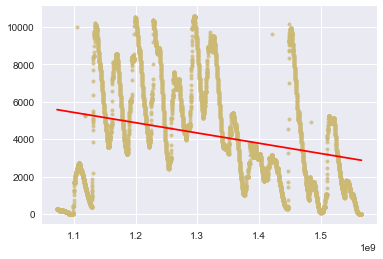

In [23]:
import matplotlib.pyplot as plt

def predict(x):
    return slope1 * x + intercept1

fitLine = predict(frame_reservoir_levels)
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 12
#fig_size[1] = 9
plt.scatter(frame_reservoir_levels, total_reservoir_levels , marker='.', color=colors[4], alpha=0.8)
plt.plot(frame_reservoir_levels, fitLine, c='r')
plt.show()

In [24]:
'''slope for linear regression on four reservoirs'''
slope1

-5.493299576416119e-06

In [25]:
'''slope for linear regression on only poondi reservoir'''
slope

-1.915548901623425e-06

In [26]:
from sklearn.model_selection import train_test_split

new_df_lr = pd.concat([frame_reservoir_levels.to_frame(), total_reservoir_levels.to_frame()], axis = 1)
new_df_lr.columns = ['TimeStamp', 'Reservoir Level']
train, test = train_test_split(new_df_lr, test_size=0.2)

In [27]:
slope_train, intercept_train, r_value_train, p_value_train, std_err_train = stats.linregress(train['TimeStamp'], train['Reservoir Level'])
r_value_train**2

0.07106753320458399

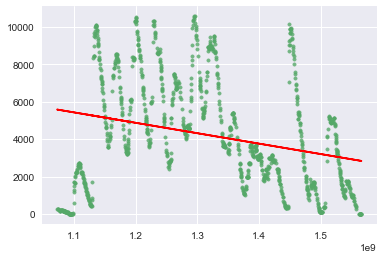

In [28]:
def predict(x):
    return slope_train * x + intercept_train

fitLine = predict(test['TimeStamp'])
#fig_size = plt.rcParams["figure.figsize"]
#fig_size[0] = 12
#fig_size[1] = 9
plt.scatter(test['TimeStamp'], test['Reservoir Level'] , marker='.', color=colors[1], alpha=0.8)
plt.plot(test['TimeStamp'], fitLine, c='r')
#plt.plot(train['TimeStamp'], predict(train['TimeStamp']), c = 'green')
plt.show()

## MULTIVARIATE LINEAR REGRESSION

In [29]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

total_rainfall = (rainfall["POONDI"] + rainfall["CHOLAVARAM"] + rainfall["REDHILLS"] + rainfall["CHEMBARAMBAKKAM"])
#x = pd.concat([frame_rainfall.to_frame(), total_rainfall.to_frame()])
temperature['Rainfall'] = total_rainfall
temperature['TimeStamp'] = frame_rainfall

x = temperature[['TimeStamp', 'Rainfall', 'TEMPERATURE']]
#x.drop(x[])
y = total_reservoir_levels

x[['TimeStamp', 'Rainfall', 'TEMPERATURE']] = scale.fit_transform(x[['TimeStamp', 'Rainfall', 'TEMPERATURE']].to_numpy())

x.tail(100)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3395: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3367: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

,TimeStamp,Rainfall,TEMPERATURE
5603,1.672210,-0.278675,0.988219
5604,1.672817,-0.278675,0.958870
5605,1.673425,-0.278675,0.998002
5606,1.674032,-0.278675,0.988219
5607,1.674640,0.235822,0.909955
5608,1.675247,-0.278675,1.037134
5609,1.675855,-0.278675,0.929521
5610,1.676462,-0.278675,0.861040
5611,1.677070,-0.278675,0.724078
5612,1.677677,-0.278675,0.782776


Dropping the last NaN row.

In [30]:
x.drop(x.tail(1).index,inplace=True)
x.tail()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,TimeStamp,Rainfall,TEMPERATURE
5697,1.729317,-0.278675,0.557766
5698,1.729925,-0.278675,0.616464
5699,1.730532,0.312044,0.782776
5700,1.731140,-0.278675,0.831691
5701,1.731747,-0.278675,0.694729


In [31]:
est = sm.OLS(y, x).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.030
Model:                            OLS   Adj. R-squared (uncentered):              0.030
Method:                 Least Squares   F-statistic:                              59.08
Date:                Thu, 12 Dec 2019   Prob (F-statistic):                    1.32e-37
Time:                        13:53:24   Log-Likelihood:                         -56756.
No. Observations:                5702   AIC:                                  1.135e+05
Df Residuals:                    5699   BIC:                                  1.135e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
TimeStamp    -760.9097     67.497    -11.273      0.000    -893.229    -628.590
Rainfall      -22.2400     67.582     -0.329      0.742    -154.727     110.247
TEMPERATURE  -443.0066     67.635     -6.550      0.000    -575.596    -310.417
==============================================================================
Omnibus:                      106.624   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.289
Skew:                           0.080   Prob(JB):                     2.98e-14
Kurtosis:                       2.513   Cond. No.                         1.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## POLYNOMIAL REGRESSION

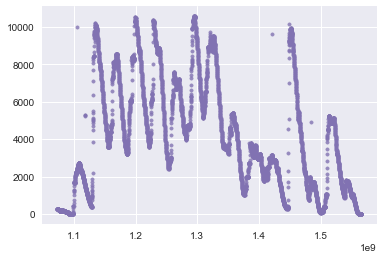

In [32]:
x1 = np.array(frame_reservoir_levels)
y1 = np.array(total_reservoir_levels)
plt.scatter(frame_reservoir_levels, total_reservoir_levels , marker='.', color=colors[3], alpha=0.8)

In [33]:
p4 = np.poly1d(np.polyfit(x1, y1, 4))
'''degree = 4'''

'degree = 4'

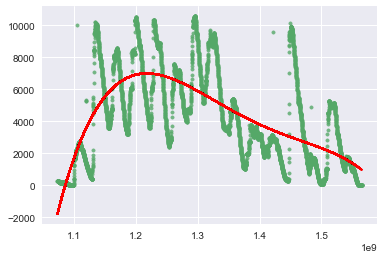

In [34]:
xp = np.linspace(frame_reservoir_levels[0], frame_reservoir_levels[:-1])
plt.scatter(x1, y1,  marker='.', color=colors[1], alpha=0.8)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [35]:
from sklearn.metrics import r2_score

r2 = r2_score(y1, p4(x1))

print(r2)

0.47102243490627094


Drastic increase in r-sqaured value to be noticed.